In [2]:
import numpy as np
from pathlib import Path

In [59]:
cache_file = Path('/fsx/cache2/1.2.826.0.1.3680043.8.498.10598166808824296940135923027195448298.npy')
cached_volume = np.load(cache_file)

In [60]:
print("Shape:", cached_volume.shape)
print("Data type:", cached_volume.dtype)
print("Min value:", cached_volume.min())
print("Max value:", cached_volume.max())

Shape: (128, 512, 512)
Data type: float32
Min value: 0.0
Max value: 1.0


In [61]:
cache_file = Path('/fsx/cache/1.2.826.0.1.3680043.8.498.11520870097231550107457991899847738783.npy')
cached_volume = np.load(cache_file)

In [ ]:
print("Shape:", cached_volume.shape)
print("Data type:", cached_volume.dtype)
print("Min value:", cached_volume.min())
print("Max value:", cached_volume.max())

Shape: (128, 512, 512)
Data type: float32
Min value: 0.0
Max value: 1.0


# Find the maximum number of slices

In [10]:
import json
from pathlib import Path

def find_max_slices(manifest_path: str):
    max_slices = 0
    with Path(manifest_path).open("r") as f:
        for line in f:
            row = json.loads(line)
            series_path = Path(row["image_path"])
            if series_path.exists():
                count = sum(1 for _ in series_path.glob('*.dcm'))
                if count > max_slices:
                    max_slices = count
                    print(f"New max found: {max_slices}")
    return max_slices

In [11]:
max_slices = find_max_slices('/fsx/processed/data-manifest.jsonl')

New max found: 188
New max found: 276
New max found: 856
New max found: 898
New max found: 909
New max found: 962
New max found: 1234
New max found: 1291
New max found: 1314
New max found: 1441


In [13]:
import json
from pathlib import Path

def find_percentile_slices(manifest_path: str, percentile: float) -> int:
    slice_counts = []
    with Path(manifest_path).open("r") as f:
        for line in f:
            row = json.loads(line)
            series_path = Path(row["image_path"])
            if series_path.exists():
                count = sum(1 for _ in series_path.glob('*.dcm'))
                slice_counts.append(count)
    
    p_value = int(np.percentile(slice_counts, percentile))
    max_val = max(slice_counts)
    print(f"Slice count distribution (min/max): {min(slice_counts)} / {max_val}")
    print(f"{percentile}th percentile slice count is: {p_value}")

    return max_slices

In [15]:
find_percentile_slices('/fsx/processed/data-manifest.jsonl', 75)

Slice count distribution (min/max): 1 / 1441
75th percentile slice count is: 297


1441

In [16]:
find_percentile_slices('/fsx/processed/data-manifest.jsonl', 50)

Slice count distribution (min/max): 1 / 1441
50th percentile slice count is: 176


1441

In [7]:
import json
from pathlib import Path

def find_slices_less_128(manifest_path: str, target_z: int):
    slice_counts_less = {}
    slice_counts_more = {}
    with Path(manifest_path).open("r") as f:
        for line in f:
            row = json.loads(line)
            series_path = Path(row["image_path"])
            if series_path.exists():
                count = sum(1 for _ in series_path.glob('*.dcm'))
                if count < target_z:
                    slice_counts_less[series_path] = count
                else:
                    slice_counts_more[series_path] = count
    return slice_counts_less, slice_counts_more

In [8]:
slices_less_128, slices_more_128 = find_slices_less_128('/fsx/processed/data-manifest.jsonl', 128)

In [9]:
slices_less_128

{PosixPath('/fsx/raw/series/1.2.826.0.1.3680043.8.498.10012790035410518400400834395242853657'): 1,
 PosixPath('/fsx/raw/series/1.2.826.0.1.3680043.8.498.10030804647049037739144303822498146901'): 1,
 PosixPath('/fsx/raw/series/1.2.826.0.1.3680043.8.498.10034081836061566510187499603024895557'): 83,
 PosixPath('/fsx/raw/series/1.2.826.0.1.3680043.8.498.10035782880104673269567641444954004745'): 1,
 PosixPath('/fsx/raw/series/1.2.826.0.1.3680043.8.498.10042423585566957032411171949972906248'): 116,
 PosixPath('/fsx/raw/series/1.2.826.0.1.3680043.8.498.10058383541003792190302541266378919328'): 88,
 PosixPath('/fsx/raw/series/1.2.826.0.1.3680043.8.498.10058588444796585220635465116646088095'): 30,
 PosixPath('/fsx/raw/series/1.2.826.0.1.3680043.8.498.10070371997983281654193426002305027111'): 30,
 PosixPath('/fsx/raw/series/1.2.826.0.1.3680043.8.498.10073947840865129766563613260212070964'): 120,
 PosixPath('/fsx/raw/series/1.2.826.0.1.3680043.8.498.10083588592953106038022099657923782077'): 24,
 

In [4]:
import pydicom

In [27]:
min_numOfFrames = float("inf")
max_numOfFrames = -1

for path in slices_less_8:
    files = sorted(path.glob("*.dcm"))
    slices = [pydicom.read_file(str(fp)) for fp in files]

    numOfFrames = slices[0].NumberOfFrames
    min_numOfFrames = min(min_numOfFrames, numOfFrames)
    max_numOfFrames = max(max_numOfFrames, numOfFrames)

print(min_numOfFrames, max_numOfFrames)


21 180


In [43]:
path = Path('/fsx/raw/series/1.2.826.0.1.3680043.8.498.10012790035410518400400834395242853657')
files = sorted(path.glob("*.dcm"))
slices = [pydicom.read_file(str(fp)) for fp in files]

slices[0]

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 196
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Enhanced MR Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.826.0.1.3680043.8.498.78695464190669736782077124549122120692
(0002, 0010) Transfer Syntax UID                 UI: RLE Lossless
(0002, 0012) Implementation Class UID            UI: 1.2.804.114118.3
(0002, 0013) Implementation Version Name         SH: 'RadiAnt-2025.1'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'TOF', 'NONE']
(0008, 0016) SOP Class UID                       UI: Enhanced MR Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.826.0.1.3680043.8.498.75206494637570575939256404615022232157
(0008, 0020) Study D

In [ ]:

print(slices[0].NumberOfFrames)


In [41]:
slices[0].PerFrameFunctionalGroupsSequence[5].PlanePositionSequence[0].ImagePositionPatient[2]

'2.75'

In [ ]:
fr.PlanePositionSequence[0].ImagePositionPatient[2]

In [14]:
next(iter(slices_more_128))

PosixPath('/fsx/raw/series/1.2.826.0.1.3680043.8.498.10004044428023505108375152878107656647')

In [15]:
path = next(iter(slices_more_128))
files = sorted(path.glob("*.dcm"))
slices_more = [pydicom.read_file(str(fp)) for fp in files]

In [18]:
slices_more[0].ImageOrientationPatient

[0.99688433239816, 0.02784302498146, -0.0737996868487, -0.0243633284098, 0.99856746684415, 0.04763866485585]

In [19]:
slices_more[3].ImageOrientationPatient

[0.99688433239816, 0.02784302498146, -0.0737996868487, -0.0243633284098, 0.99856746684415, 0.04763866485585]

In [20]:
path = next(iter(slices_more_128))
files = sorted(path.glob("*.dcm"))
slices_more = [pydicom.read_file(str(fp)) for fp in files]

In [22]:
path

PosixPath('/fsx/raw/series/1.2.826.0.1.3680043.8.498.10004044428023505108375152878107656647')

In [21]:
slices_more[0].ImageOrientationPatient

[0.99688433239816, 0.02784302498146, -0.0737996868487, -0.0243633284098, 0.99856746684415, 0.04763866485585]

In [27]:
slices_iterator = iter(slices_more_128)
first_item = next(slices_iterator)
second_item = next(slices_iterator)

files = sorted(second_item.glob("*.dcm"))
slices_more = [pydicom.read_file(str(fp)) for fp in files]
second_item

PosixPath('/fsx/raw/series/1.2.826.0.1.3680043.8.498.10004684224894397679901841656954650085')

In [28]:
slices_more[0].ImageOrientationPatient

[0.99231, 0.08809, -0.08701, -0.09474, 0.99263, -0.07553]

In [33]:
slices_more[50].ImagePositionPatient

[-106.8521423340, -142.1660614014, -14.7888650894]

In [55]:
slices_iterator = iter(slices_less_128)
first_item = next(slices_iterator)
second_item = next(slices_iterator)
third_item = next(slices_iterator)
fourth_item = next(slices_iterator)
fifth_item = next(slices_iterator)

files = sorted(fifth_item.glob("*.dcm"))
slices_less = [pydicom.read_file(str(fp)) for fp in files]
second_item

PosixPath('/fsx/raw/series/1.2.826.0.1.3680043.8.498.10030804647049037739144303822498146901')

In [58]:
len(files)

116

In [68]:
path = Path('/fsx/raw/series/1.2.826.0.1.3680043.8.498.11527986509512933171256788651291467752')
files = sorted(path.glob("*.dcm"))
slices_none = [pydicom.read_file(str(fp)) for fp in files]
slices_none[0]

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 196
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.826.0.1.3680043.8.498.7510624107505149393565170943182506010
(0002, 0010) Transfer Syntax UID                 UI: RLE Lossless
(0002, 0012) Implementation Class UID            UI: 1.2.40.0.13.1.1.1
(0002, 0013) Implementation Version Name         SH: 'dcm4che-1.4-JP'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL']
(0008, 0012) Instance Creation Date              DA: '20250220'
(0008, 0013) Instance Creation Time              TM: '104639'
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Instance UID       

In [69]:
slices_none[0].PatientWeight

# Inspect `.npy`

In [73]:
import matplotlib.pyplot as plt

In [80]:
def plot_slice(file_path):
    vol = np.load('/fsx/cache2/' + file_path)

    print(f"Shape of the volume (Z, H, W): {vol.shape}")
    print(f"Data type: {vol.dtype}")
    print(f"Value range: min={vol.min():.2f}, max={vol.max():.2f}")

    num_slices = vol.shape[0]
    slice_indices = [0, num_slices // 2, num_slices - 1]

    fix, axes = plt.subplots(1, 3, figsize=(15, 5))
    for i, slice_idx in enumerate(slice_indices):
        axes[i].imshow(vol[slice_idx], cmap='gray')
        axes[i].set_title(f"Slice {slice_idx}")
        axes[i].axis('off')
    plt.suptitle("Verification of Resampled Volume")
    plt.show()


Shape of the volume (Z, H, W): (128, 608, 552)
Data type: float32
Value range: min=0.00, max=1.00


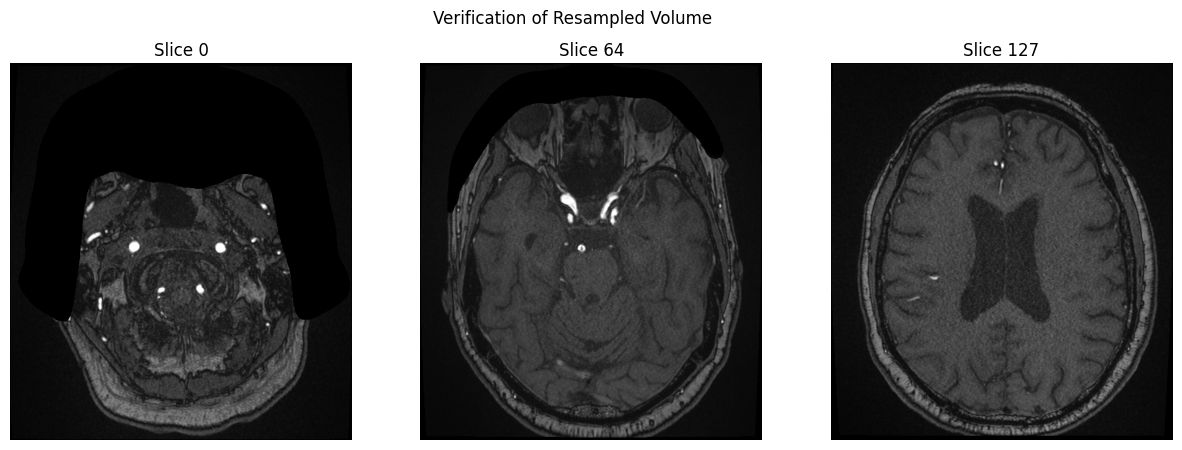

In [81]:

plot_slice('1.2.826.0.1.3680043.8.498.12259849523422440791219468904406598397.npy')

Shape of the volume (Z, H, W): (128, 512, 512)
Data type: float32
Value range: min=0.00, max=1.00


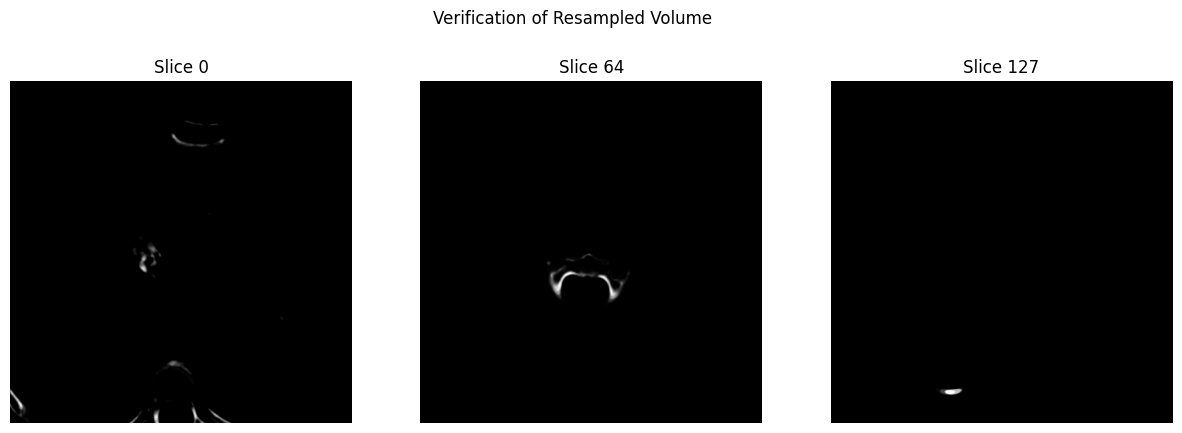

In [82]:
plot_slice('1.2.826.0.1.3680043.8.498.12180552386746360147901020901436537667.npy')

Shape of the volume (Z, H, W): (128, 512, 512)
Data type: float32
Value range: min=0.44, max=1.00


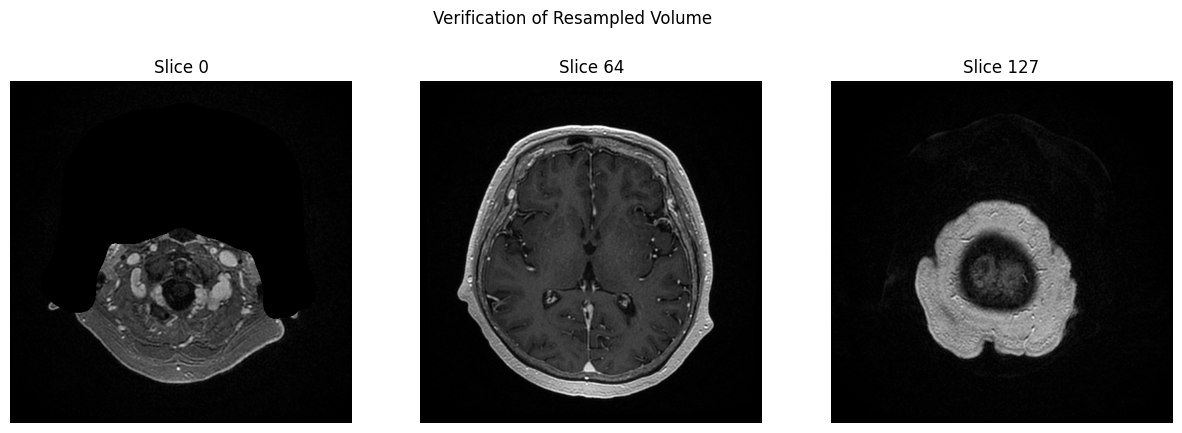

In [83]:
plot_slice('1.2.826.0.1.3680043.8.498.12180351938456969219537687190067731477.npy')

Shape of the volume (Z, H, W): (128, 528, 528)
Data type: float32
Value range: min=0.00, max=1.00


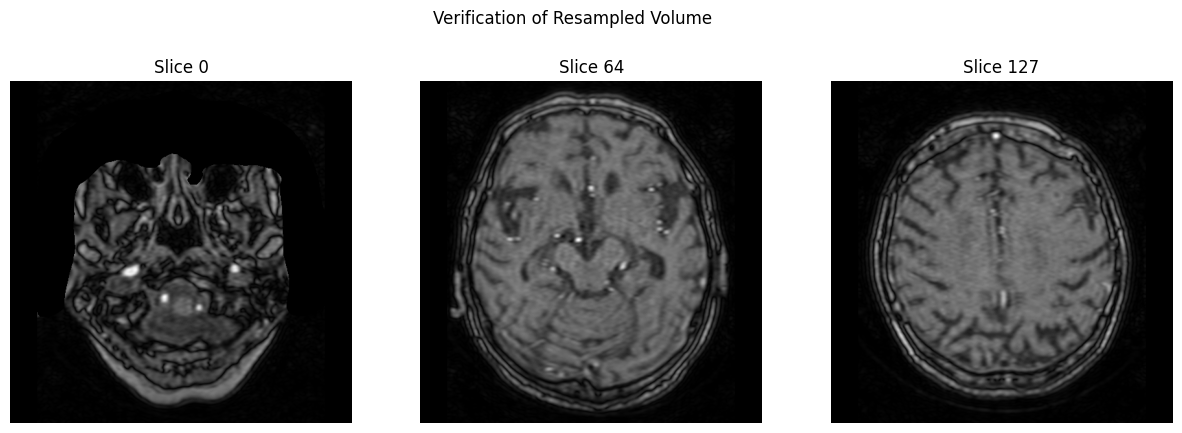

In [84]:
plot_slice('1.2.826.0.1.3680043.8.498.12184578310937455363841952501480013055.npy')

In [86]:
path = Path('/fsx/raw/series/1.2.826.0.1.3680043.8.498.87547461665007390981451704461752148942')
files = sorted(path.glob("*.dcm"))
slices_none = [pydicom.read_file(str(fp)) for fp in files]
slices_none[0].NumberOfFrames

'1'